In [1]:
import os
from pathlib import Path
root_path = Path(os.getcwd()).parent
data_path = root_path / "data"

/home/solan/repos/iu/Course 3/Fall Semester/CV/Project/CV_VideoClassification_project/data/raw/UCF50/YoYo/v_YoYo_g02_c04.avi
{'video': {'fps': [25.0], 'duration': [6.64]}}
166
dict_keys(['data', 'pts'])
torch.Size([3, 240, 320])


/home/solan/repos/iu/Course 3/Fall Semester/CV/Project/CV_VideoClassification_project/.venv/lib/python3.12/site-packages/torchvision/io/video_reader.py:241: UserWarning: Accurate seek is not implemented for pyav backend
  warnings.warn("Accurate seek is not implemented for pyav backend")


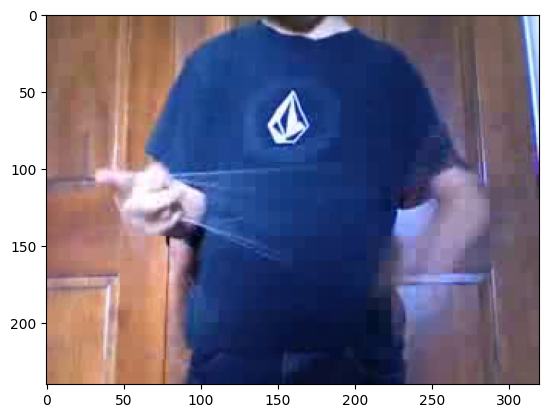

In [7]:
import matplotlib.pyplot as plt
from torchvision.io import VideoReader

for p in (data_path / "raw" / "UCF50" / "YoYo").iterdir():
    print(p)
    reader = VideoReader(str(p), "video")
    print(reader.get_metadata())
    print(len([frame for frame in reader]))

    reader.seek(0)
    for frame in reader:
        print(frame.keys())
        break

    print(frame['data'].shape)
    plt.imshow(frame['data'].permute(1, 2, 0))
    plt.show()
    break

In [2]:
import sys

SCRIPT_DIR = os.getcwd()
sys.path.append(os.path.dirname(SCRIPT_DIR))

In [3]:
print(sys.path)

['/home/linuxbrew/.linuxbrew/opt/python@3.12/lib/python312.zip', '/home/linuxbrew/.linuxbrew/opt/python@3.12/lib/python3.12', '/home/linuxbrew/.linuxbrew/opt/python@3.12/lib/python3.12/lib-dynload', '', '/home/solan/repos/iu/Course 3/Fall Semester/CV/Project/CV_VideoClassification_project/.venv/lib/python3.12/site-packages', '/home/solan/repos/iu/Course 3/Fall Semester/CV/Project/CV_VideoClassification_project']


In [5]:
from data.dataset import VideoDataset

train_dataset = VideoDataset(
    dataset_dir=data_path / "raw" / "UCF50",
    filenames=["v_YoYo_g01_c01.avi"]
)
len(train_dataset)

1

In [6]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    train_dataset,
    batch_size=1,
    # shuffle=True,
    # num_workers=4,
    # collate_fn=train_dataset.collate_fn
)
for batch in train_dataloader:
    frames, label = batch
    print(frames.shape)

torch.Size([1, 187, 240, 320, 3])
